<a href="https://colab.research.google.com/github/minmings111/AICA_study/blob/main/AICA_2025_08_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2025.08.13. --1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
df = pd.read_csv('./data/wine.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [5]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [7]:
model = Sequential()

# Dense: 은닉층 안의 노드 수. 너무 많으면 과적합, 적으면 학습불가.
# 은닉층이 너무 많아도 과적합, 기울기 소실 문제 발생 가능성 있음.
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 500, validation_split = 0.25)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.2373 - loss: 22.9063 - val_accuracy: 0.2438 - val_loss: 12.6653
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2461 - loss: 9.7218 - val_accuracy: 0.3377 - val_loss: 1.3608
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6015 - loss: 0.8319 - val_accuracy: 0.7585 - val_loss: 0.8513
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7556 - loss: 1.0138 - val_accuracy: 0.7577 - val_loss: 1.0684
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7580 - loss: 1.1448 - val_accuracy: 0.7592 - val_loss: 0.9798
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7531 - loss: 1.0680 - val_accuracy: 0.7923 - val_loss: 0.7683
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8003 - loss: 0.7663 - val_accuracy: 0.8400 - val_loss: 0.5255
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8481 - loss: 0.5304 - val_accuracy: 0.8869 - val_loss: 0.328

In [10]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9377 - loss: 0.1873
Test loss: 0.196896031498909
Test accuracy: 0.9330769181251526


In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

In [12]:
modelpath = './data/model/all/all-{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=1)

In [13]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 500,
                    validation_split = 0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/all-01-0.1849.keras

Epoch 2: saving model to ./data/model/all/all-02-0.1838.keras

Epoch 3: saving model to ./data/model/all/all-03-0.1825.keras

Epoch 4: saving model to ./data/model/all/all-04-0.1812.keras

Epoch 5: saving model to ./data/model/all/all-05-0.1797.keras

Epoch 6: saving model to ./data/model/all/all-06-0.1780.keras

Epoch 7: saving model to ./data/model/all/all-07-0.1767.keras

Epoch 8: saving model to ./data/model/all/all-08-0.1755.keras

Epoch 9: saving model to ./data/model/all/all-09-0.1743.keras

Epoch 10: saving model to ./data/model/all/all-10-0.1730.keras

Epoch 11: saving model to ./data/model/all/all-11-0.1682.keras

Epoch 12: saving model to ./data/model/all/all-12-0.1645.keras

Epoch 13: saving model to ./data/model/all/all-13-0.1612.keras

Epoch 14: saving model to ./data/model/all/all-14-0.1579.keras

Epoch 15: saving model to ./data/model/all/all-15-0.1544.keras

Epoch 16: saving model to ./data/model/all/all-1

In [14]:
# overfit
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500,
                    validation_split = 0.25, verbose=0)

KeyboardInterrupt: 

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

In [ ]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

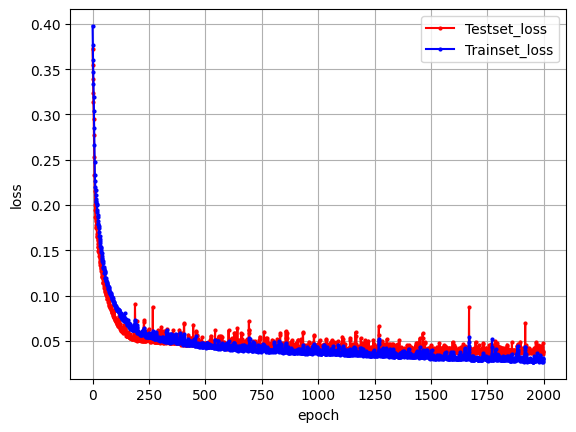

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='o', c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, marker='o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# 2025.08.13. --2

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './data/model/bestmodel.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=0,
                               monitor='val_loss', save_best_only=True)

# 성능이 나빠지면 중단되기 때문에 2000번이 다 돌지 않음.
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500,
                    validation_split = 0.25, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3628 - loss: 1.1086 - val_accuracy: 0.7662 - val_loss: 0.4821
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7828 - loss: 0.4928 - val_accuracy: 0.8292 - val_loss: 0.3891
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8443 - loss: 0.3687 - val_accuracy: 0.8754 - val_loss: 0.3023
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8829 - loss: 0.3044 - val_accuracy: 0.8985 - val_loss: 0.2886
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8878 - loss: 0.2932 - val_accuracy: 0.8977 - val_loss: 0.2512
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8952 - loss: 0.2639 - val_accuracy: 0.9215 - val_loss: 0.2267
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9188 - loss: 0.2361 - val_accuracy: 0.9262 - val_loss: 0.2137
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9208 - loss: 0.2328 - val_accuracy: 0.9254 - v

In [18]:
# 최적의 모델~ 엄청난 정확도~~
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0357
Test loss: 0.049272794276475906
Test accuracy: 0.9884615540504456


In [19]:
# 2025.08.13. --3
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from numpy import array

In [20]:
text = '해보지 않으면 해낼 수 없다'

result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [21]:
docs = [
    '먼저 텍스트의 각 단어를 나누어 토큰화를 합니다.',
    '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
    '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.'
]

token = Tokenizer()
token.fit_on_texts(docs)

print('\n단어 카운트:\n', token.word_counts)
print('\n문장 카운트:\n', token.document_count)
print('\n각 단어에 매겨진 인덱스 값:\n', token.word_index)


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화를', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:
 3

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화를': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


In [22]:
## one-hot incoding

text = '오랫동안 꿈꾸는 이는 그 꿈을 닮아간다'
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [23]:
x = token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [24]:
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes = word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [25]:
# 학습데이터
docs = [
    '너무 재밌네요', '최고예요', '참 잘 만든 영화예요', '추천하고 싶은 영화입니다', '한번 더 보고싶네요',
    '글쎄요', '별로예요', '생각보다 지루하네요', '연기가 어색해요', '재미없어요'
]

# 정답데이터 // 긍정은 1, 부정은 0
classes = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [26]:
x = token.texts_to_sequences(docs)
print('\n리뷰 텍스트, 토큰화 결과: \n', x)


리뷰 텍스트, 토큰화 결과: 
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [27]:
padded_x = pad_sequences(x, 4)
print('\n패딩결과: \n', padded_x)


패딩결과: 
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [30]:
# 2025.08.14. --1

word_size = len(token.word_index) + 1

model = Sequential()
model.add(Embedding(word_size, 8))
model.build((None, 4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 4, 8)           │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print('\n Accuracy: %.4f' % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9000 - loss: 0.6806
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9000 - loss: 0.6786
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9000 - loss: 0.6766
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9000 - loss: 0.6746
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9000 - loss: 0.6726
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9000 - loss: 0.6706
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9000 - loss: 0.6686
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9000 - loss: 0.6666
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9000 - loss: 0.6646
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9000 - loss: 0.6626
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9000 - loss: 0.6606
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9000 - loss: 0.6586
E

In [39]:
padded_x[7].shape
padded_x[7].reshape(1, -1).shape

(1, 4)

In [35]:
sample_input = padded_x[7].reshape(1, -1)
prediction = model.predict(sample_input)
print('예측된 확률:', prediction[0][0])
print('예측된 클래스:', 1 if prediction[0][0] >= 0.5 else 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
예측된 확률: 0.45626575
예측된 클래스: 0
